<a href="https://colab.research.google.com/github/glukonatic/mystudy/blob/master/III_PRO_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №1
## студента Университета искусственного интеллекта
## Наговицына Антона Михайловича
### Поток PRO НС - апрель 2020 (основной тариф).
![alt Nagovitsyn_Anton](https://proza.ru/photos/glukonatic.jpg)

# Light. Вариант 1




---


Перепишите ноутбук по распознаванию рукописных цифр, восстановив следующие операции:
1.   Импорт библиотек.
2.   Загрузка базы mnist.
3.   Нормирование и преобразование x_train и y_train.
4.   Создание нейронной сети.
5.   Обучение нейронной сети.

Можно смотреть в ноутбук с занятия, но код необходимо писать самостоятельно.


---



In [0]:
#@title 1. Импорт библиотек

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab as pl
import pandas as pd
import collections
import math
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

In [0]:
#@title 2. Загрузка базы mnist

(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

In [0]:
#@title 3. Нормирование и преобразование x_train и y_train

x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [40]:
#@title 4. Создание нейронной сети
#@markdown Для построения модели можно указать число нейронов для скрытого слоя (слоёв). defNeyrons1 - число нейронов в первом скрытом слое, defNeyrons2 - во втором. Можно указать для второго слоя 0 - второй слой добавляться не будет. Эти параметры - глобальные для всех блоков.

defNeyrons1 = 320 #@param {type:"slider", min:16, max:1000, step:16}
defNeyrons2 = 320 #@param {type:"slider", min:0, max:1000, step:16}

#@markdown ---

defActivation = 'relu'

model = Sequential()
model.add(Dense(defNeyrons1, input_dim=784, activation=defActivation))
if defNeyrons2 > 0:
  model.add(Dense(defNeyrons2, activation=defActivation))
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_73 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_74 (Dense)             (None, 10)                3210      
Total params: 357,130
Trainable params: 357,130
Non-trainable params: 0
_________________________________________________________________


In [41]:
#@title 5. Обучение нейронной сети
#@markdown Для обучения модели можно указать величину выборок defBatchSize, количество эпох defEpochs, параметром defVerbose можно установить отображение процесса обучения. Эти параметры - глобальные для всех блоков.

defBatchSize = 128 #@param {type:"slider", min:128, max:1024, step:128}
defEpochs = 15 #@param {type:"slider", min:1, max:20}
defVerbose = 0  #@param {type: "slider", min: 0, max: 1}

#@markdown ---

model.fit(x_train, y_train, batch_size=defBatchSize, epochs=defEpochs, verbose=defVerbose)

# Light. Вариант 2



---


Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.
1.   Поменяйте количество нейронов в сети, используя следующие значения:
  *   один слой 10 нейронов
  *   один слой 100 нейронов
  *   один слой 5000 нейронов
2.   Поменяйте активационную функцию в скрытых слоях с relu на linear.
3.   Поменяйте размеры batch_size:
  *   1
  *   10
  *   100
  *   Вся база (60000)
4.   Запишите в таблицу получившиеся точности.
5.   Напишите выводы по результатам проведенных тестов.


---



In [0]:
#@title Подготовка к проведению экспериментов. Инициализация переменных.

# Определим глобальные функции для дальнейших экспериментов

def runFit(numOfNeyrons=defNeyrons2,batchSize=defBatchSize,
           epochs=defEpochs,verbose=defVerbose,activation=defActivation):
  '''
    Функция runFit, создающая модель, как на занятии, но с меньшим числом нейронов, 
    с определенным количеством нейронов в скрытом слое.
    На вход принимает значения:
    numOfNeyrons - целочисленное значение, число нейронов;
    batchSize - размер "пачки" примеров для обучения модели;
    epochs - количество эпох для обучения модели;
    verbose - флаг для вывода информации о компиляции модели, 0 или 1;
    activation - активационная функция в одном из скрытых слоёв (во втором).
    По умолчанию функция принимает дефолтные значения аргументов.
    Функция возвращает объект history созданной модели.
  '''
  model = Sequential()
  model.add(Dense(defNeyrons1, input_dim=784, activation=activation))
  if numOfNeyrons > 0 :
    model.add(Dense(numOfNeyrons, activation=activation))
  model.add(Dense(10, activation="softmax"))
  model.compile(loss="categorical_crossentropy", optimizer="adam", 
                metrics=["accuracy"])
  model.summary()
  return model.fit(x_train, y_train, batch_size=batchSize, 
                   epochs=epochs, verbose=verbose)


def runPlot(paramDict,experimentName):
  '''
    Функция runPlot, отрисовывающая графики по полученным в экспериментах данным
    На вход принимает значения:
    paramDict - словарь полученных в результате экспериментов данных
    experimentName - определяет, какой эксперимент был проведён
  '''
  # Инициализируем графики, их у нас всегда по два - для точности и для потерь
  f, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,5))

  # Сформируем кастомные заголовки для графиков
  labels = []

  # Перебираем словарь результатов экспериментов
  for key, value in paramDict.items():
    if experimentName == 'custom_neyrons':
      labels.append(str(key) + ' нейронов')
      f.suptitle('Графики для сравнения зависимости точности модели от числа нейронов')
    if experimentName == 'custom_activation':
      labels.append('Активационная функция ' + key)
      f.suptitle('Графики для сравнения зависимости точности модели от выбранной активационной функции в сравнении с \'relu\'')
    if experimentName == 'custom_batchsize':
      labels.append('batch_size = ' + str(key))
      f.suptitle('Графики для сравнения зависимости точности модели от batch_size')
    ax1.plot(value.history['loss'])
    ax2.plot(value.history['accuracy'])

  # Разметим графики подписями осей, заголовками и легендой
  ax1.set_title('Потери моделей')
  ax1.set_ylabel('Потери')
  ax1.set_xlabel('Эпохи')
  ax1.grid(color='g', linestyle=':', linewidth=1)
  ax1.legend(labels, loc='upper right')
  ax2.set_title('Точность моделей')
  ax2.set_ylabel('Точность')
  ax2.set_xlabel('Эпохи')
  ax2.grid(color='g', linestyle=':', linewidth=1)
  ax2.legend(labels, loc='lower right')

# Глобальные переменные для дальнейших экспериментов
historyNeyrons = collections.defaultdict()
historyBatchSize = collections.defaultdict()
historyActivation = collections.defaultdict()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_76 (Dense)             (None, 10)                3210      
_________________________________________________________________
dense_77 (Dense)             (None, 10)                110       
Total params: 254,520
Trainable params: 254,520
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_79 (Dense)             (None, 100)               32100     
________________________

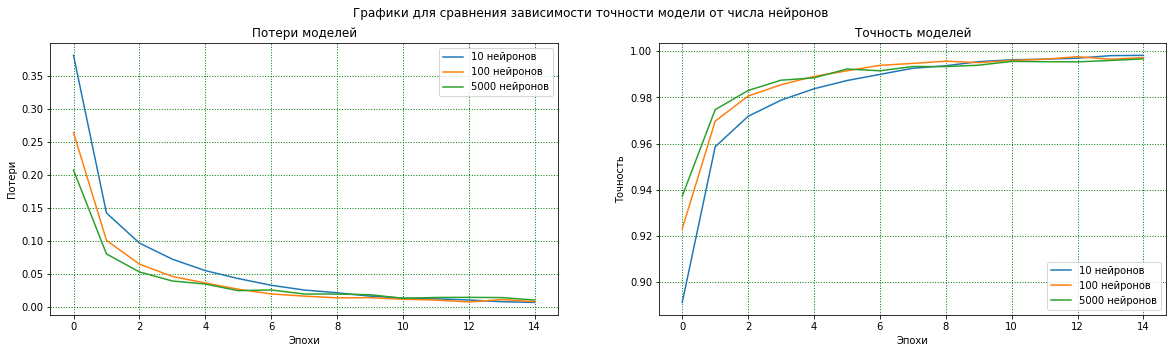

In [43]:
#@title 1. Поменяйте количество нейронов в сети.
#@markdown Ниже можно изменить число нейронов, чтобы указать отличные от задания. По умолчанию - 10, 100, 5000 нейронов.

neyronsModel1 = 10  #@param {type: "number"}
neyronsModel2 = 100  #@param {type: "number"}
neyronsModel3 = 5000  #@param {type: "number"}

#@markdown ---

# Запустим три модели с указанным числом нейронов в каждой
historyNeyrons[neyronsModel1] = runFit(numOfNeyrons=neyronsModel1)
historyNeyrons[neyronsModel2] = runFit(numOfNeyrons=neyronsModel2)
historyNeyrons[neyronsModel3] = runFit(numOfNeyrons=neyronsModel3)

# Запустим функцию построения графиков
runPlot(historyNeyrons,'custom_neyrons')

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_37 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                3210      
Total params: 357,130
Trainable params: 357,130
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_40 (Dense)             (None, 320)               102720    
________________________

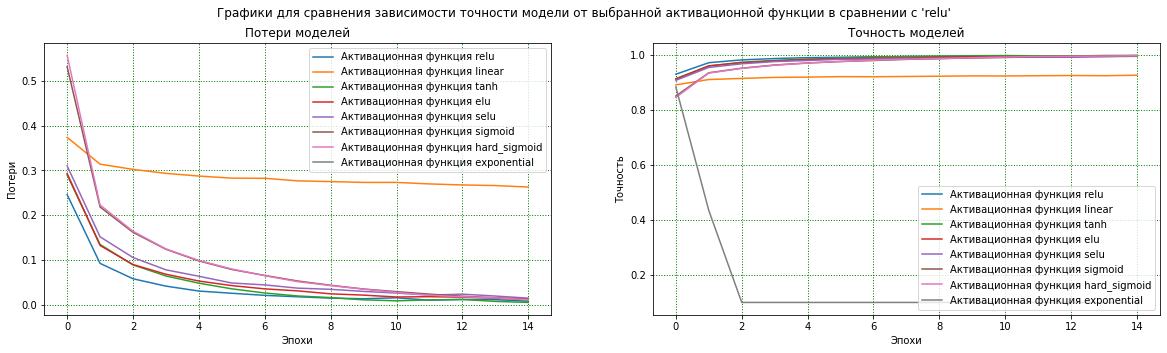

In [15]:
#@title 2. Поменяйте активационную функцию в скрытых слоях с relu на linear.
#@markdown Ниже можно изменить активационную функцию (не 'relu'). По умолчанию - 'linear'.

customActivation1 = "linear"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
#customActivation2 = "tanh"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
#customActivation3 = "elu"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
#customActivation4 = "selu"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
#customActivation5 = "sigmoid"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
#customActivation6 = "hard_sigmoid"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']
#customActivation7 = "exponential"  #@param ['linear', 'tanh', 'elu', 'selu', 'sigmoid', 'hard_sigmoid', 'exponential']

#@markdown ---

# Запустим две модели с указанной активационной функцией
historyActivation[defActivation] = runFit()
historyActivation[customActivation1] = runFit(activation=customActivation1)
#historyActivation[customActivation2] = runFit(activation=customActivation2)
#historyActivation[customActivation3] = runFit(activation=customActivation3)
#historyActivation[customActivation4] = runFit(activation=customActivation4)
#historyActivation[customActivation5] = runFit(activation=customActivation5)
#historyActivation[customActivation6] = runFit(activation=customActivation6)
#historyActivation[customActivation7] = runFit(activation=customActivation7)

# Запустим функцию построения графиков
runPlot(historyActivation,'custom_activation')

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_61 (Dense)             (None, 320)               102720    
_________________________________________________________________
dense_62 (Dense)             (None, 10)                3210      
Total params: 357,130
Trainable params: 357,130
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_64 (Dense)             (None, 320)               102720    
________________________

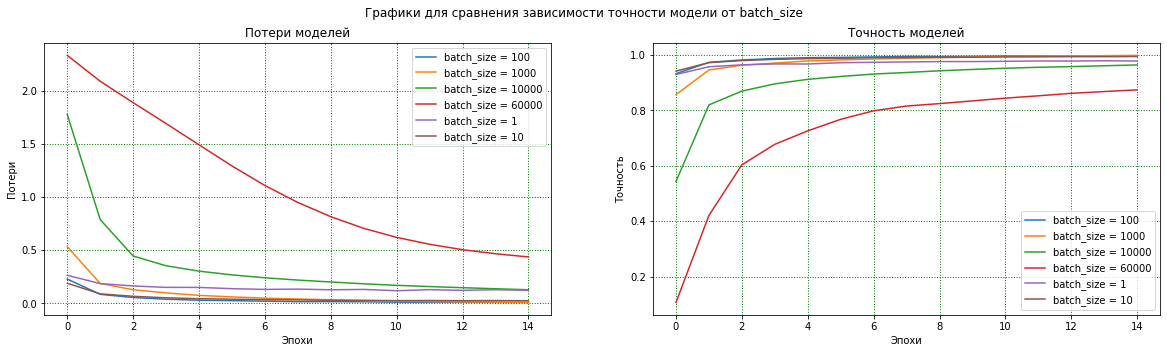

In [36]:
#@title 3. Поменяйте размеры batch_size.
#@markdown Ниже можно изменить число нейронов, чтобы указать отличные от задания. По умолчанию: 1, 10, 100, 60000. Внимание! При batch_size < 50 возможно длительное ожидание завершения работы блока.

batchModel1 = 1  #@param {type: "number"}
batchModel2 = 10  #@param {type: "number"}
batchModel3 = 100  #@param {type: "number"}
batchModel4 = 60000  #@param {type: "number"}

#@markdown ---

# Запустим четыре модели с указанным числом batch_size в каждой
historyBatchSize[batchModel1] = runFit(batchSize=batchModel1)
historyBatchSize[batchModel2] = runFit(batchSize=batchModel2)
historyBatchSize[batchModel3] = runFit(batchSize=batchModel3)
historyBatchSize[batchModel4] = runFit(batchSize=batchModel4)

# Запустим функцию построения графиков
runPlot(historyBatchSize,'custom_batchsize')

4. Запишите в таблицу получившиеся точности.

In [10]:
#@title 4.1 Таблица экспериментов, зависимость точности от числа нейронов.

neyronsAccuracyData = pd.DataFrame(index=range(1,defEpochs+1))
for key, value in historyNeyrons.items():
  neyronsAccuracyData[key] = value.history['accuracy']

print('Строки - номера эпох, столбцы - число нейронов в скрытом слое')
neyronsAccuracyData

Строки - номера эпох, столбцы - число нейронов в скрытом слое


,10,50,100
1,0.881517,0.921817,0.925017
2,0.960250,0.967950,0.970167
3,0.972983,0.977950,0.979450
4,0.979767,0.985100,0.985650
5,0.984600,0.989667,0.989400
6,0.987867,0.991217,0.991983
7,0.990867,0.993383,0.993383
8,0.992467,0.994800,0.994833
9,0.994133,0.995000,0.995150
10,0.995783,0.996283,0.996083


In [16]:
#@title 4.2 Таблица экспериментов, зависимость точности от активационной функции.

activationAccuracyData = pd.DataFrame(index=range(1,defEpochs+1))
for key, value in historyActivation.items():
  activationAccuracyData[key] = value.history['accuracy']

print('Строки - номера эпох, столбцы - название активационной функции')
activationAccuracyData

Строки - номера эпох, столбцы - название активационной функции


,relu,linear,tanh,elu,selu,sigmoid,hard_sigmoid,exponential
1,0.929933,0.891183,0.914017,0.911917,0.907683,0.850433,0.845400,0.882983
2,0.971950,0.910650,0.959800,0.960583,0.954700,0.935250,0.934267,0.433750
3,0.982183,0.914683,0.973733,0.971583,0.967867,0.951967,0.951133,0.098717
4,0.987083,0.918350,0.980300,0.978367,0.976100,0.963583,0.962750,0.098717
5,0.990383,0.919483,0.985350,0.983250,0.979967,0.970900,0.970783,0.098717
6,0.991783,0.921133,0.988950,0.986350,0.984333,0.976183,0.976550,0.098717
7,0.993467,0.920750,0.992267,0.988350,0.985100,0.980083,0.981017,0.098717
8,0.994183,0.921800,0.994550,0.989583,0.987900,0.984067,0.984917,0.098717
9,0.995067,0.922767,0.995567,0.991917,0.988017,0.986567,0.987067,0.098717
10,0.995800,0.923917,0.997383,0.993100,0.990050,0.989750,0.990067,0.098717


In [12]:
#@title 4.3 Таблица экспериментов с изменением batch_size.

batchSizeAccuracyData = pd.DataFrame(index=range(1,defEpochs+1))
for key, value in historyBatchSize.items():
  batchSizeAccuracyData[key] = value.history['accuracy']

print('Строки - номера эпох, столбцы - размер batch_size')
batchSizeAccuracyData

Строки - номера эпох, столбцы - размер batch_size


,100,1000,10000,60000
1,0.933217,0.856800,0.543467,0.100350
2,0.972767,0.945983,0.819883,0.353717
3,0.981500,0.963167,0.869700,0.575667
4,0.988183,0.970767,0.895767,0.678683
5,0.990467,0.978367,0.912100,0.737467
6,0.991800,0.982050,0.922500,0.766083
7,0.993183,0.985600,0.931217,0.781600
8,0.994250,0.988317,0.936800,0.797800
9,0.994600,0.990250,0.942867,0.817883
10,0.994800,0.992583,0.947883,0.836850


5. Напишите выводы по результатам проведенных тестов.

Выводы:

1. При увеличении числа нейронов в скрытом слое точность предсказания НС повышается. При этом есть некое значение числа нейронов, выше которого точность либо повышается совсем незначительно, либо не повышается вовсе, при этом временные затраты на обучение нейронной сети сильно повышаются.
2. При уменьшении batch_size увеличивается точность предсказания НС. При совсем малых значениях может потребоваться много ресурсов для обучения модели НС (либо время, либо аппаратные мощности). При больших значениях выборок требуется большое количество эпох.
3. Активационная функция relu показала себя лучше, чем другие проверенные АФ (linear, tanh, elu, selu, sigmoid, hard_sigmoid, exponential). При этом функция exponential довольно странно себя показала. Требуется дополнительное исследование отдельно по ней.
4. Если сделать число эпох большим, то модель НС может переобучиться.

# Pro



---


Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).
Последовательность шагов:
1. В графическом редакторе рисуем произвольную цифру.
2. Сохраняем документ и загружаем его в Collaboratory.
3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
5. Выполняем инверсию цветов, нормирование и решейп массива.
6. Выполняем распознавание собственной рукописной цифры.

Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения).


---




In [30]:
#@title 1-2. В графическом редакторе рисуем произвольную цифру. Сохраняем документ и загружаем его в Collaboratory.

from google.colab import files

uploadedFile = files.upload()

Saving 4.png to 4.png


In [31]:
#@title 3. С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.

for key in uploadedFile.keys():
  filename = key
img = image.load_img(filename, target_size=(28, 28), color_mode = 'grayscale')
img

Отрисуем массив, полученный из файла загруженой цифры, на экран


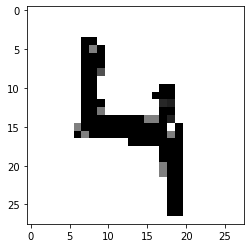

In [32]:
#@title 4. С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.

imageArray = image.img_to_array(img).reshape(28,28)
plt.imshow(Image.fromarray(imageArray).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
print('Отрисуем массив, полученный из файла загруженой цифры, на экран')
plt.show()

Отрисуем инвертированную картинку на экран


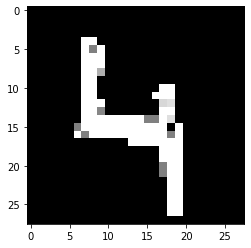

Размерность массива до решейпа (784,)
Размерность массива после решейпа (1, 784)


In [33]:
#@title 5. Выполняем инверсию цветов, нормирование и решейп массива.

# Инверсия цветов
imageArray = 255 - imageArray
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
print('Отрисуем инвертированную картинку на экран')
plt.show()

# Решейп
imageArrayReshape = imageArray.reshape(784,)
print('Размерность массива до решейпа',imageArrayReshape.shape)
imageArrayReshape = np.expand_dims(imageArrayReshape, axis=0)
print('Размерность массива после решейпа',imageArrayReshape.shape)

# Нормирование
imageArray = imageArray.astype('float32')
imageArray = imageArray / 255


In [34]:
#@title 6. Выполняем распознавание собственной рукописной цифры.

prediction = model.predict(imageArrayReshape)
print('Выходной вектор результата распознавания:',prediction)
prediction = np.argmax(prediction)
print('Модель распознала цифру:',prediction)

Выходной вектор результата распознавания: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Модель распознала цифру: 4


Saving 2.jpg to 2.jpg
Отрисуем загруженую цифру на экран


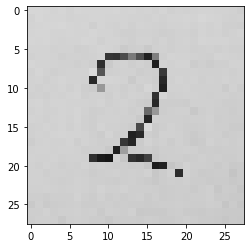

Отрисуем контрастированную картинку на экран


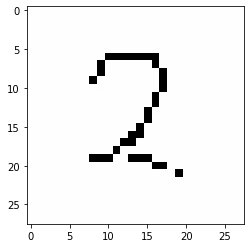

Отрисуем инвертированную картинку на экран


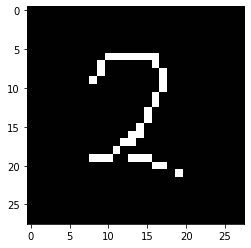

Выходной вектор результата распознавания: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Модель распознала цифру: 2


In [35]:
#@title Реализуйте тот же алгоритм для написанной на листе от руки цифры (для этого необходимо сделать дополнительную предобработку изображения). Здесь нам потребуется поработать с контрастностью картинки. Для этого вводится коэффициент контрастности (лучшее значение подбирается опытным путём). Так же нужно загрузить файл (при запуске ячейки отобразится панель загрузки).
from google.colab import files

uploadedFile = files.upload()

#Загрузка картинки

contrast = 1.36 #@param {type:"slider", min:0, max:10, step:0.01}

for key in uploadedFile.keys():
  filename = key
img = image.load_img(filename, target_size=(28, 28), color_mode = 'grayscale')

print('Отрисуем загруженую цифру на экран')
imageArray = image.img_to_array(img).reshape(28,28)
#print(imageArray)
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

def contrastingImage(img, coeff):
  '''
  Функция для повышения контрастности картинки.
  На вход принимает:
  img - файл картинки,
  coeff - коэффициент контраста, больше либо равен 1.
  На выходе - массив строки пикселей картинки
  '''

  result = []
  avg = np.mean(image.img_to_array(img))
  for x in range(img.size[0]):
    for y in range(img.size[1]):
      g = img.getpixel((y, x))
      result.append((math.tanh((g - avg/coeff))+1)*127)
  return result

# Отконтрастируем картинку
arr = contrastingImage(img, contrast)

# Преобразуем полученный одномерный массив в двумерный
imageArray = np.asarray(arr).reshape(28,28)
print('Отрисуем контрастированную картинку на экран')
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

# Инверсия цветов
imageArray = 255 - imageArray
print('Отрисуем инвертированную картинку на экран')
plt.imshow(Image.fromarray(imageArray).convert('RGBA'))
plt.show()

# Сделаем решейп
imageArrayReshape = imageArray.reshape(784,)
imageArrayReshape = np.expand_dims(imageArrayReshape, axis=0)

# Нормируем
imageArray = imageArray.astype('float32')
imageArray = imageArray / 255

# Распознаём
prediction = model.predict(imageArrayReshape)
print('Выходной вектор результата распознавания:',prediction)
prediction = np.argmax(prediction)
print('Модель распознала цифру:',prediction)

In [29]:
#@title Зачистка папки виртуального окружения от загруженных картинок формата jpeg, png и jpg.

!rm *.jpeg *.png *.jpg
!ls

rm: cannot remove '*.png': No such file or directory
sample_data
